In [1]:
library("dplyr")
library("ggplot2")
library("ggrepel")
library("gridExtra")
library("forcats")

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'forcats' was built under R version 3.6.2"

In [2]:
#import data
speed_dating_adj <- read.csv("speed_dating_clean.csv")

#match integers to career names
careers <- data.frame("career_c" = 1:17, career =
                 c("1" ="Lawyer", "2"= "Academic/Research", "3"= "Psychologist", "4"= "Doctor/Medicine",
                   "5"="Engineer", "6"= "Creative Arts/Entertainment",
                   "7"= "Business",
                   "8"= "Real Estate", "9"= "International/Humanitarian Affairs", "10"= "Undecided", "11"="Social Work",
                   "12"="Speech Pathology", "13"= "Politics", "14"="Pro sports/Athletics",
                   "15"="Other", "16"="Journalism", "17"="Architecture"))

#update match to be yes or no
career_df <- left_join(x = speed_dating_adj, y = careers, by = "career_c")
career_df$match <- ifelse(career_df$match==0, "no", "yes")

#create data frame with counts and proportions of matches
counts <- rbind(table(career_df$match, career_df$career),total = unlist(apply(table(career_df$match, career_df$career), 2, sum)))
props <- rbind(no_prop = counts[1,] / counts[3,], yes_prop = counts[2,] / counts[3,])
career_counts <- as.data.frame(cbind(t(counts), t(props)))
career_counts$career <- row.names(career_counts)
career_counts$overall_yes_prop <- career_counts$yes/sum(career_counts$yes)

#normalize by career population compared to total population
career_counts$overall_yes_prop_norm <- career_counts$yes/sum(career_counts$yes)*(career_counts$total/sum(career_counts$total))
#career_counts[order(career_counts$yes_prop, decreasing = TRUE),]
#career_counts[order(career_counts$yes, decreasing = TRUE),]

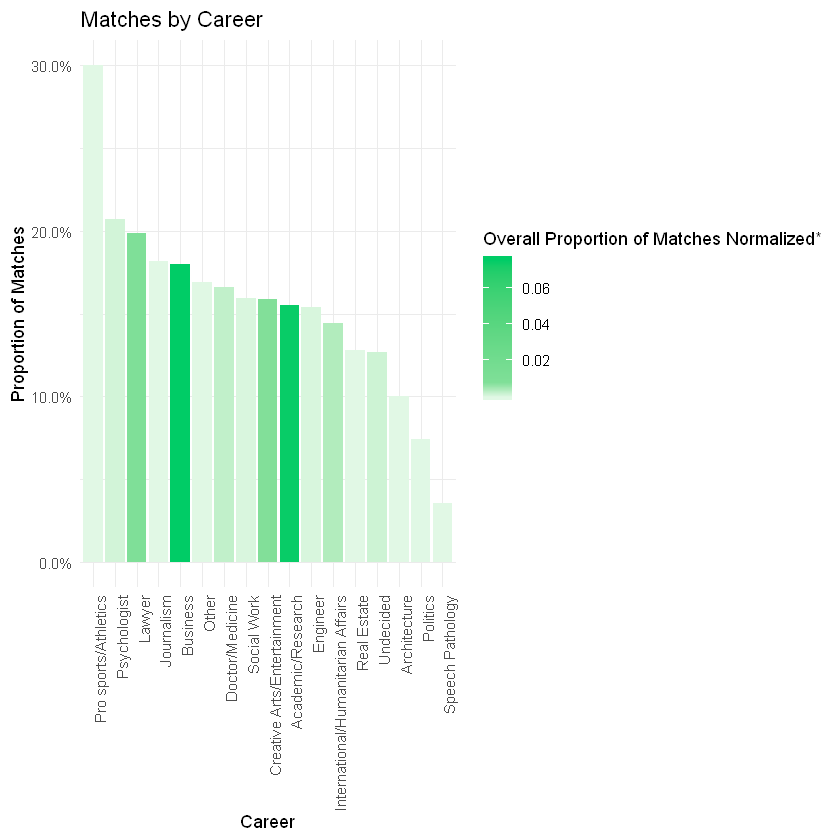

In [3]:
#career strings for x-axis labels
x_labels <- factor(career_counts[order(career_counts$yes_prop, decreasing = TRUE),]$career,
                   ordered = TRUE, levels = career_counts[order(career_counts$yes_prop, decreasing = TRUE),]$career)
#plot with gradient color scale
ggplot(career_counts, aes(x = x_labels, y = career_counts[order(career_counts$yes_prop, decreasing = TRUE),]$yes_prop,
                         fill = career_counts[order(career_counts$yes_prop, decreasing = TRUE),]$overall_yes_prop_norm)) +
    geom_bar(stat = "identity") + scale_y_continuous(labels = scales::percent) + theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Matches by Career") +
    xlab("Career") + ylab("Proportion of Matches") +
    scale_fill_gradientn("Overall Proportion of Matches Normalized*",
                         colors = c("#e1f8e5", "#80df98", "#00CC66"), values = c(0, 0.1, 1))

Warning message:
"Removed 32 rows containing missing values (geom_point)."

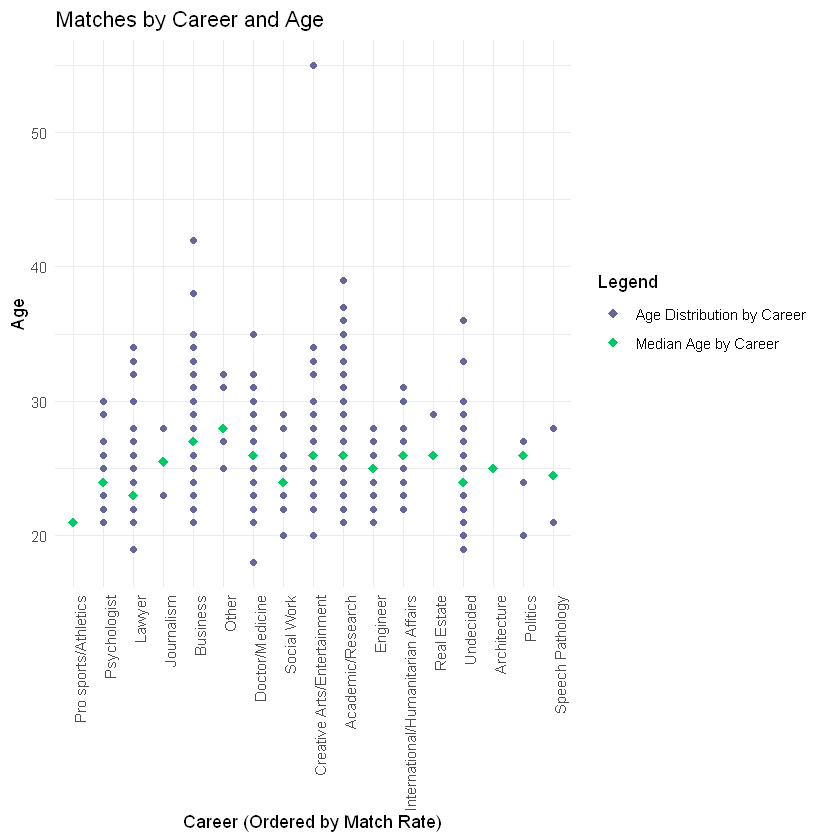

In [5]:
#format data for scatterplot by converting to factor and removing NAs
career_df$careers_factor <- factor(career_df$career, levels = x_labels)
plot_data <- career_df[!is.na(career_df$career),]

#calculate median age by career
medians <- tapply(plot_data$age, plot_data$careers_factor, median,(na.rm=TRUE))
medians <- data.frame("age" = medians, "careers_factor" = names(medians))

#plot scatterplot
ggplot(plot_data, aes(x=careers_factor, y=age, color = "Age Distribution by Career")) + 
    geom_point() + theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("Career (Ordered by Match Rate)") + ylab("Age") + ggtitle("Matches by Career and Age") +
    geom_point(data = medians, shape = 18, size = 2.5,
               mapping = aes(x=careers_factor, y = age, color = "Median Age by Career")) +
    labs(color = "Legend") + scale_color_manual(values=c("#666699","#00CC66"))